<a href="https://colab.research.google.com/github/itsonlyvin/google-colab/blob/main/Gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from google.colab import files
files.upload()

Saving gld_price_data.csv to gld_price_data.csv


{'gld_price_data.csv': b'Date,SPX,GLD,USO,SLV,EUR/USD\r\n1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692\r\n1/3/2008,1447.160034,85.57,78.370003,15.285,1.474491\r\n1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492\r\n1/7/2008,1416.180054,84.769997,75.5,15.053,1.468299\r\n1/8/2008,1390.189941,86.779999,76.059998,15.59,1.557099\r\n1/9/2008,1409.130005,86.550003,75.25,15.52,1.466405\r\n1/10/2008,1420.329956,88.25,74.019997,16.061001,1.4801\r\n1/11/2008,1401.02002,88.580002,73.089996,16.077,1.479006\r\n1/14/2008,1416.25,89.540001,74.25,16.280001,1.4869\r\n1/15/2008,1380.949951,87.989998,72.779999,15.834,1.48021\r\n1/16/2008,1373.199951,86.699997,71.849998,15.654,1.466405\r\n1/17/2008,1333.25,86.5,71.029999,15.717,1.464\r\n1/18/2008,1325.189941,87.419998,71.540001,16.030001,1.461796\r\n1/22/2008,1310.5,88.169998,70.550003,15.902,1.464794\r\n1/23/2008,1338.599976,87.889999,69.5,15.9,1.463208\r\n1/24/2008,1352.069946,90.080002,70.93,16.299999,1.47741\r\n1/25/2008,1330.609985,90

In [51]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [50]:
# print first 5 values
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 values
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting basic info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.positive correlation

2.negative correlation

In [34]:
correlation = gold_data.corr()

<ipython-input-34-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

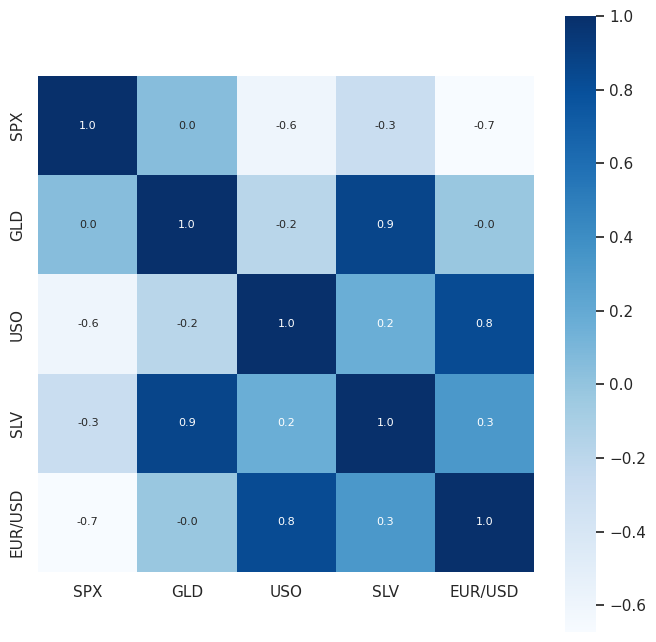

In [47]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [48]:
#correlation vlaues of Gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-49-9fea8248150b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

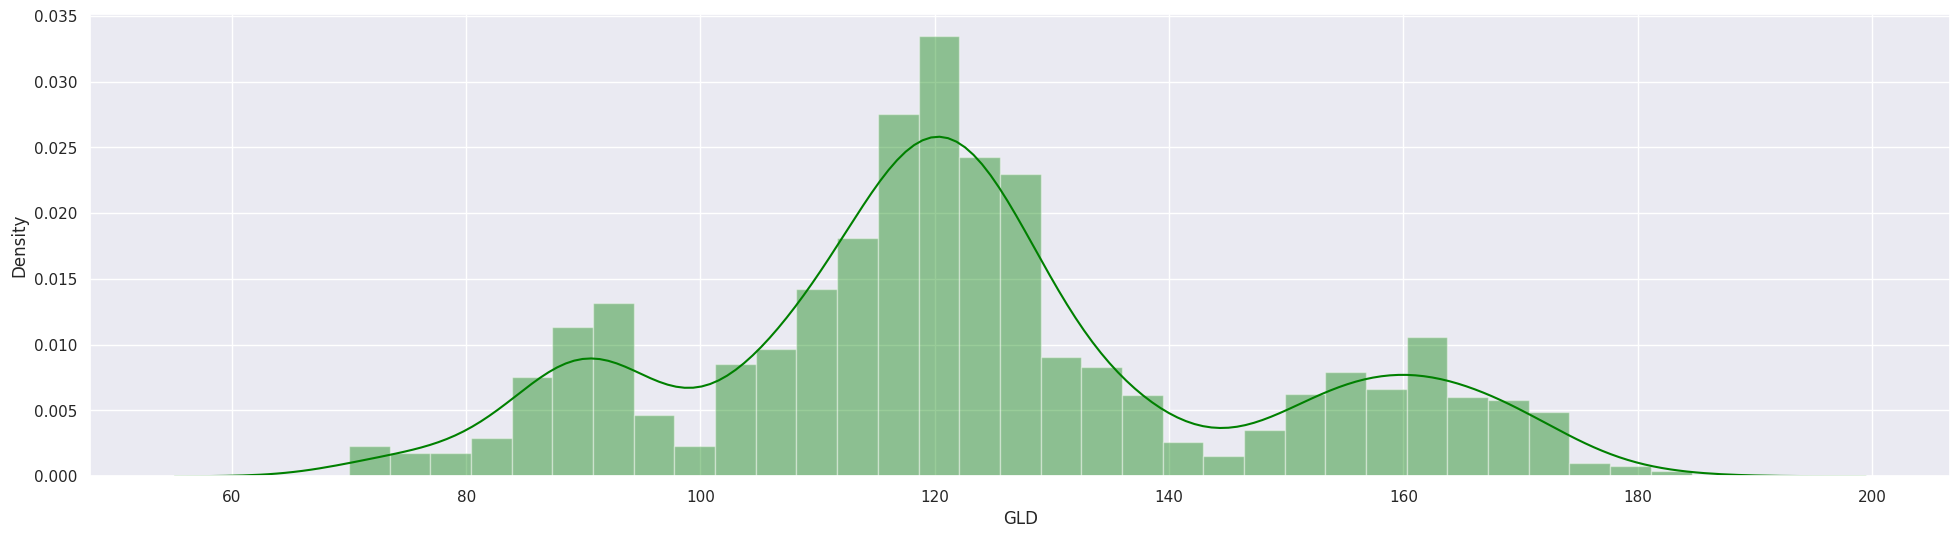

In [49]:
 #checking the distribution of the GLD price
plt.figure(figsize=(24,6))
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [54]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [55]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [59]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and testing data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [62]:
print(X_train)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]


Model training

RandomForest Regressor

In [65]:
regressor = RandomForestRegressor(n_estimators=100)

In [66]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model evaluation

In [67]:
# prediction on TestData
test_data_prediction = regressor.predict(X_test)

In [68]:
print(test_data_prediction)

[168.5487992   81.90669989 116.43839987 127.75060076 120.6189013
 154.8616978  150.19569956 126.047301   117.53429876 125.90180126
 116.66840105 172.15590102 141.75849948 167.88019836 115.26820016
 117.49250068 139.21270329 170.1643014  159.70010291 157.13609971
 155.18460029 125.45270004 176.61049963 157.29960345 125.29320055
  93.86279967  77.18410047 120.66980012 118.99739882 167.48539889
  88.09900029 125.31750051  91.29170081 117.50000029 121.15739894
 136.77710071 115.41800108 114.75530085 147.37769939 107.34680078
 104.68270244  87.22299782 126.54550072 117.70739985 152.86709889
 119.58330014 108.44750015 108.32509832  93.28060052 127.15799751
  74.90200047 113.60299926 121.14510011 111.19929927 118.86749896
 120.69919932 158.39929984 167.39320129 146.82669659  85.81679848
  94.58510032  86.76199864  90.74760043 119.07370073 126.51150058
 127.48169986 170.24220078 122.3316993  117.60839941  98.51030071
 168.4676018  143.14819892 131.97250218 121.08140214 121.21739944
 119.575400

In [74]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9889826720285596


Compare the Actual Values and Predicted Values in a Plot

In [75]:
Y_test = list(Y_test)

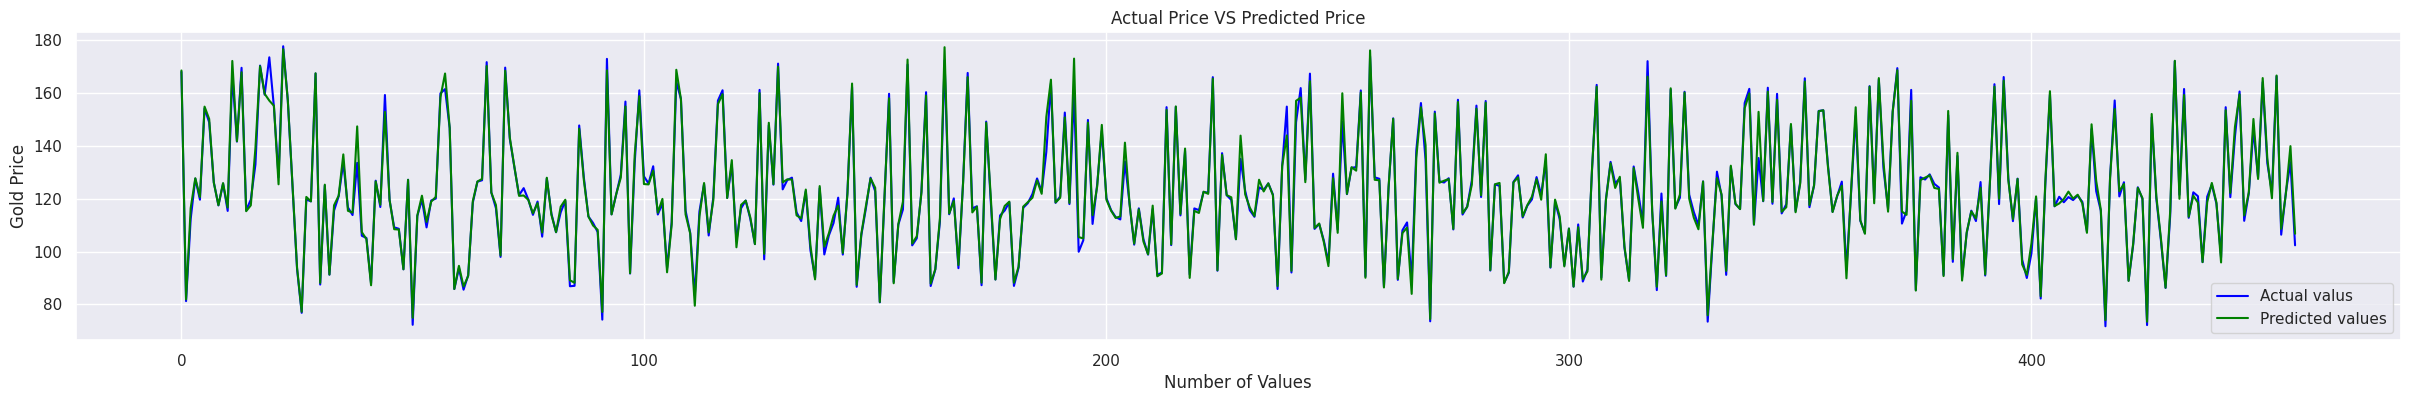

In [83]:
plt.figure(figsize=(30,4))
plt.plot(Y_test, color = 'blue', label = 'Actual valus')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted values')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [84]:
input_data=(2697.790039, 14.370000,	15.5300, 1.184722)
input_data_as_numpy_array=np.array(input_data)
reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(reshaped)
print('gold price: ',prediction[0])

gold price:  123.63330066000006


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
